In [102]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print("Train : {}, Test: {}".format(df_train.shape,df_test.shape))

df_train.head()

Train : (550068, 12), Test: (233599, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [104]:
print("NA Values - Train DS")
for col in df_train.columns:
    lna = len(df_train[df_train[col].isna()])
    print("{} : {}".format(col,lna))
print()
print("NA Values - Test DS")
for col in df_test.columns:
    lna = len(df_test[df_test[col].isna()])
    print("{} : {}".format(col,lna))

NA Values - Train DS
User_ID : 0
Product_ID : 0
Gender : 0
Age : 0
Occupation : 0
City_Category : 0
Stay_In_Current_City_Years : 0
Marital_Status : 0
Product_Category_1 : 0
Product_Category_2 : 173638
Product_Category_3 : 383247
Purchase : 0

NA Values - Test DS
User_ID : 0
Product_ID : 0
Gender : 0
Age : 0
Occupation : 0
City_Category : 0
Stay_In_Current_City_Years : 0
Marital_Status : 0
Product_Category_1 : 0
Product_Category_2 : 72344
Product_Category_3 : 162562


In [105]:
print("Unique values count")
for col in ['User_ID','Product_ID','Gender','Age','Occupation','Stay_In_Current_City_Years','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']:
    print("{} : {}".format(col,len(df_train[col].unique())))

Unique values count
User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
Stay_In_Current_City_Years : 5
City_Category : 3
Marital_Status : 2
Product_Category_1 : 20
Product_Category_2 : 18
Product_Category_3 : 16


In [106]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [107]:
print(sorted(df_train['Product_Category_1'].unique()))
df_Y = df_train['Purchase']
df = df_train.drop("Purchase",axis=1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [108]:
df = df.append(df_test,sort=False,ignore_index=True)
df.fillna(0,inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df.Gender)
df['Age'] = le.fit_transform(df.Age)
#city category, ohe
df['Stay_In_Current_City_Years'].replace('4+',4,inplace=True)

df = pd.get_dummies(df,columns=['City_Category','Product_Category_1'],prefix=["City","Product_Cat"])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,City_A,...,Product_Cat_11,Product_Cat_12,Product_Cat_13,Product_Cat_14,Product_Cat_15,Product_Cat_16,Product_Cat_17,Product_Cat_18,Product_Cat_19,Product_Cat_20
0,1000001,P00069042,0,0,10,2,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,0,0,10,2,0,6.0,14.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,0,0,10,2,0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,0,0
3,1000001,P00085442,0,0,10,2,0,14.0,0.0,1,...,0,1,0,0,0,0,0,0,0,0
4,1000002,P00285442,1,6,16,4,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in df.index:
    cat2 = df.iloc[i].Product_Category_2
    if cat2 != 0:
        df.ix[i , "Product_Cat_"+str(int(cat2)) ] = 1
    
    cat3 = df.iloc[i].Product_Category_3
    if cat3 != 0:
        df.ix[i , "Product_Cat_"+str(int(cat3)) ] = 1 

In [ ]:
df.head()

In [ ]:
df.to_csv("final_df_550068_233599.csv",index=False)

In [109]:
df = pd.read_csv("final_df_550068_233599.csv")
print(df.shape)
df = pd.get_dummies(df,columns=["Age","Stay_In_Current_City_Years"])
df.head()

(783667, 32)


,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_2,Product_Category_3,City_A,City_B,City_C,...,Age_2,Age_3,Age_4,Age_5,Age_6,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000001,P00069042,0,10,0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,0,10,0,6.0,14.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,0,10,0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,0,10,0,14.0,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,1,16,0,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [110]:
submission = df[550068:][["User_ID","Product_ID"]]
df.drop(["User_ID","Product_ID","Product_Category_2","Product_Category_3"],axis=1,inplace=True)
X = df[:550068]
Y = df_Y[:550068]
X_test = df[550068:]
Y_test = df_Y[550068:]

In [111]:
X.head()

,Gender,Occupation,Marital_Status,City_A,City_B,City_C,Product_Cat_1,Product_Cat_2,Product_Cat_3,Product_Cat_4,...,Age_2,Age_3,Age_4,Age_5,Age_6,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,0,10,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,10,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,16,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Visualizations
Relations
1. Gender vs Purchase
2. Age vs Purchase
3. Stay vs Purcahse
4. Marital vs Purchase
5. City vs Purchase
6. Occupations vs Purchase
7. Age vs Marital
8. Occpation vs Age

Distributions
1. Stay
2. Occupation
3. Purchase

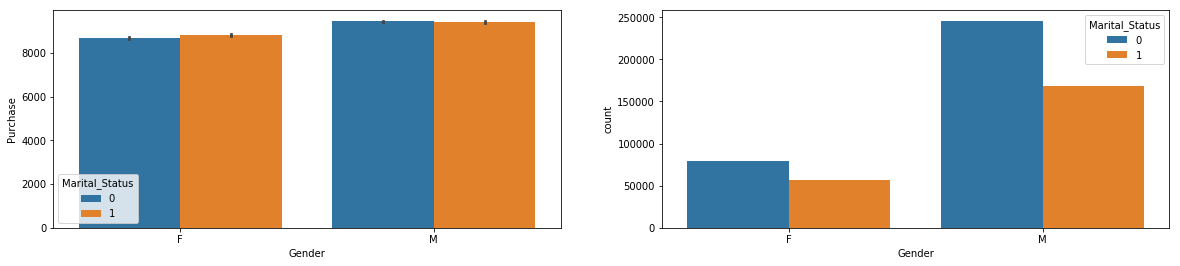

In [11]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Gender",y="Purchase",hue="Marital_Status",estimator=np.mean,data=df_train,ax=ax[0])
sns.countplot(x="Gender",hue="Marital_Status",data=df_train,ax=ax[1])

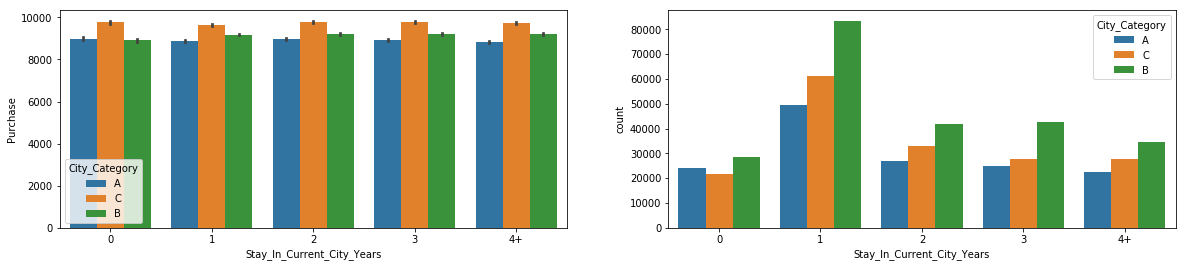

In [12]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Stay_In_Current_City_Years",y="Purchase",hue="City_Category",order=["0","1","2","3","4+"],estimator=np.mean,data=df_train,ax=ax[0])
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category",order=["0","1","2","3","4+"],data=df_train,ax=ax[1])

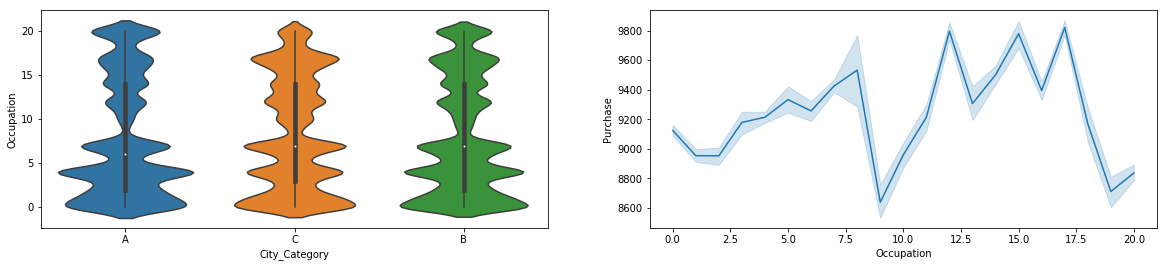

In [13]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.violinplot(x="City_Category",y="Occupation",data=df_train,ax=ax[0])
sns.lineplot(x="Occupation",y="Purchase",data=df_train,ax=ax[1])

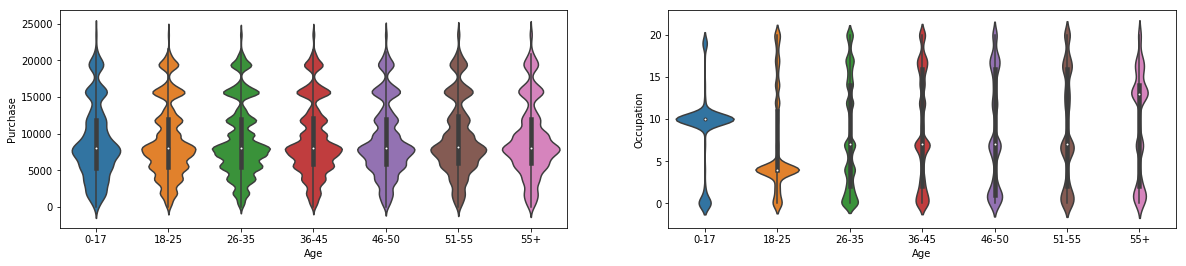

In [14]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.violinplot(x="Age",y="Purchase",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],data=df_train,ax=ax[0])
sns.violinplot(x="Age",y="Occupation",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],data=df_train,ax=ax[1])

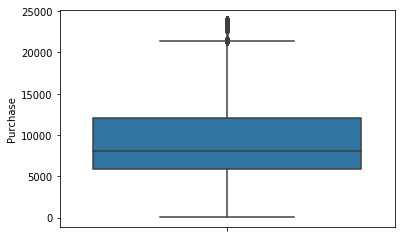

In [15]:
sns.boxplot(y="Purchase",data=df_train)

### Lets see some correlations
1. Occupation vs Purchase
2. Occupation vs Stay

In [16]:
print("Occ and Purchase : {}".format(np.corrcoef(X.Occupation,Y)))

Occ and Purchase : [[ 1.          0.02083262]
 [ 0.02083262  1.        ]]


In [17]:
print("Occ and Stay : {}".format(np.corrcoef(X.Occupation,X.Stay_In_Current_City_Years)))

Occ and Stay : [[ 1.          0.03000458]
 [ 0.03000458  1.        ]]


### Split train and test data

In [113]:
from sklearn.model_selection import train_test_split
(X_train,X_Validation,Y_train,Y_Validation) = train_test_split(X,Y,test_size=0.2,random_state=5)
print("{} {} | {} {}".format(X_train.shape,Y_train.shape,X_Validation.shape,Y_Validation.shape))

(440054, 38) (440054,) | (110014, 38) (110014,)


### Try some models
1. Linear Regression
2. SGDRegressor
3. SVR
4. XGBoost Regressor
5. Deep Neural Net

In [114]:
from sklearn.metrics import mean_squared_error

def rmse(y_,y):
    return mean_squared_error(y_,y)**0.5

In [115]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_ = lr.predict(X_Validation)
print(rmse(y_,Y_Validation))

3632.29516197


In [116]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state=5,max_iter=50)
sgd.fit(X_train,Y_train)
y_ = sgd.predict(X_Validation)
print(rmse(y_,Y_Validation))

3679.07423084


In [22]:
"""from sklearn.svm import SVR
svr = SVR(C=0.5,tol=0.00001)
svr.fit(X_train,Y_train)
y_ = svr.predict(X_Validation)
print(rmse(y_,Y_Validation))"""

'from sklearn.svm import SVR\nsvr = SVR(C=0.5,tol=0.00001)\nsvr.fit(X_train,Y_train)\ny_ = svr.predict(X_Validation)\nprint(rmse(y_,Y_Validation))'

In [63]:
## XGBoost

In [117]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()
#Layer 1
model.add(Dense(512,input_shape=(X_train.shape[1],)))
model.add(Activation("relu"))

#Layer 2
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.1))

#Layer 3
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("linear"))

model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mean_squared_error"])

In [118]:
from time import time
from keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard
save_model_back_callback = ModelCheckpoint("ann_black_friday.hdf5",monitor="val_loss",save_best_only=True,verbose=1)
early_stopping_callback = EarlyStopping(monitor="val_loss",patience=2,verbose=1)
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

callback_list = [save_model_back_callback,early_stopping_callback,tensorboard]

In [119]:
n_epochs=30
batch_size = 32

model.fit(X_train,Y_train,
          epochs=n_epochs,
          batch_size=batch_size,
          callbacks=callback_list,
          validation_data=(X_Validation,Y_Validation),
          shuffle=True,verbose=1)

Train on 440054 samples, validate on 110014 samples
Epoch 1/30
440054/440054 [==============================] - 172s 390us/step - loss: 11566715.0472 - mean_squared_error: 11566715.0472 - val_loss: 8988230.4868 - val_mean_squared_error: 8988230.4868

Epoch 00001: val_loss improved from inf to 8988230.48676, saving model to ann_black_friday.hdf5
Epoch 2/30
440054/440054 [==============================] - 159s 361us/step - loss: 9019643.7275 - mean_squared_error: 9019643.7275 - val_loss: 8673463.1098 - val_mean_squared_error: 8673463.1098

Epoch 00002: val_loss improved from 8988230.48676 to 8673463.10979, saving model to ann_black_friday.hdf5
Epoch 3/30
440054/440054 [==============================] - 143s 324us/step - loss: 8826276.3942 - mean_squared_error: 8826276.3942 - val_loss: 8565730.1584 - val_mean_squared_error: 8565730.1584

Epoch 00003: val_loss improved from 8673463.10979 to 8565730.15836, saving model to ann_black_friday.hdf5
Epoch 4/30
440054/440054 [=====================

In [120]:
model.load_weights(filepath="ann_black_friday.hdf5")

In [121]:
Y_test = model.predict(X_test)
Y_test[:10]

array([[ 15808.79785156],
       [ 11103.75292969],
       [  6936.42919922],
       [  3220.83618164],
       [  2592.44702148],
       [ 11151.3203125 ],
       [ 12030.24511719],
       [ 10391.0625    ],
       [ 18893.7109375 ],
       [  5827.28662109]], dtype=float32)

In [122]:
ans = pd.DataFrame({
    "User_ID":submission.User_ID,
    "Product_ID":submission.Product_ID,
    "Purchase":Y_test.reshape((len(Y_test)))
})
ans.to_csv("submission5.csv",index=False)